# Convolutional Neural Network (CNN) for CIFAR-10 Classification

## Overview

This notebook demonstrates the implementation of a **Convolutional Neural Network (CNN)** for classifying images from the **CIFAR-10 dataset** into two categories: objects that can fly (class 1) and objects that cannot fly (class 0). The CNN architecture is trained on the CIFAR-10 training set and evaluated on both a custom test file and the CIFAR-10 test batch.

## CNN Architecture

The CNN architecture consists of the following layers:

1. **Convolutional Layers**: Three convolutional layers with ReLU activation functions. These layers extract features from the input images through convolution operations.

2. **MaxPooling Layers**: Three max-pooling layers to downsample the feature maps obtained from the convolutional layers. Max-pooling helps reduce spatial dimensions and control overfitting.

3. **Flatten Layer**: Flattens the output from the last max-pooling layer into a one-dimensional vector, preparing it for input into the fully connected layers.

4. **Fully Connected Layers (Dense Layers)**: Two fully connected layers with ReLU activation functions and a dropout layer for regularization. These layers perform classification based on the features extracted by the convolutional layers.

5. **Output Layer**: The output layer consists of a single neuron with a sigmoid activation function, producing a binary classification output indicating whether the object can fly (class 1) or cannot fly (class 0).

## Training Strategy

The model is trained using the Adam optimizer with a binary cross-entropy loss function. The training data is normalized and split into training and validation sets. The model is trained for 10 epochs with a batch size of 64.

## Evaluation Strategy

The model is evaluated on both a custom test file and the CIFAR-10 test batch. Evaluation metrics including accuracy, precision, recall, and F1 score are calculated. Additionally, a confusion matrix is generated to visualize the model's performance on the test data.


# Import Libraries

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Function to unpickle the dataset

In [13]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Load CIFAR-10 training data

In [14]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


# Load CIFAR-10 test batch from file

In [15]:
test_batch = unpickle('test_batch')
x_test_batch = test_batch[b'data']
y_test_batch = test_batch[b'labels']


# Reshape and normalize test batch images

In [16]:
x_test_batch = x_test_batch.reshape(len(x_test_batch), 3, 32, 32).transpose(0, 2, 3, 1)
x_test_batch = x_test_batch.astype('float32') / 255.0

# Convert test batch labels to binary

In [17]:
can_fly = [0, 2]  # 0: airplane, 2: bird
cannot_fly = [1, 3, 4, 5, 6, 7, 8, 9]  # all other classes
y_test_batch = np.array(y_test_batch)
y_test_batch_bin = np.isin(y_test_batch, can_fly).astype(int)


# Convert training labels to binary

In [18]:
y_train_bin = np.isin(y_train, can_fly).astype(int)

# Normalize the training data

In [19]:
x_train = x_train.astype('float32') / 255.0

# Define the CNN model

In [20]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model

In [22]:
history = model.fit(x_train, y_train_bin, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 56s 87ms/step - loss: 0.4339 - accuracy: 0.8180 - val_loss: 0.3822 - val_accuracy: 0.8442
Epoch 2/10
625/625 [==============================] - 54s 87ms/step - loss: 0.3740 - accuracy: 0.8460 - val_loss: 0.3715 - val_accuracy: 0.8488
Epoch 3/10
625/625 [==============================] - 53s 85ms/step - loss: 0.3382 - accuracy: 0.8636 - val_loss: 0.3123 - val_accuracy: 0.8792
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.3083 - accuracy: 0.8769 - val_loss: 0.2912 - val_accuracy: 0.8837
Epoch 5/10
625/625 [==============================] - 54s 87ms/step - loss: 0.2842 - accuracy: 0.8862 - val_loss: 0.2903 - val_accuracy: 0.8849
Epoch 6/10
625/625 [==============================] - 54s 86ms/step - loss: 0.2575 - accuracy: 0.8965 - val_loss: 0.2824 - val_accuracy: 0.8902
Epoch 7/10
625/625 [==============================] - 53s 85ms/step - loss: 0.2344 - accuracy: 0.9062 - val_loss: 0.2818 - val_accuracy:

# Make predictions on the test batch

In [23]:
y_pred_batch = (model.predict(x_test_batch) > 0.5).astype("int32")

313/313 [==============================] - 6s 18ms/step



# Calculate evaluation metrics for the test batch

In [24]:
accuracy_batch = accuracy_score(y_test_batch_bin, y_pred_batch)
precision_batch = precision_score(y_test_batch_bin, y_pred_batch)
recall_batch = recall_score(y_test_batch_bin, y_pred_batch)
f1_batch = f1_score(y_test_batch_bin, y_pred_batch)
cm_batch = confusion_matrix(y_test_batch_bin, y_pred_batch)

print(f"Test Batch Accuracy: {accuracy_batch}")
print(f"Test Batch Precision: {precision_batch}")
print(f"Test Batch Recall: {recall_batch}")
print(f"Test Batch F1 Score: {f1_batch}")

Test Batch Accuracy: 0.884
Test Batch Precision: 0.772020725388601
Test Batch Recall: 0.596
Test Batch F1 Score: 0.672686230248307



# Display the confusion matrix for the test batch

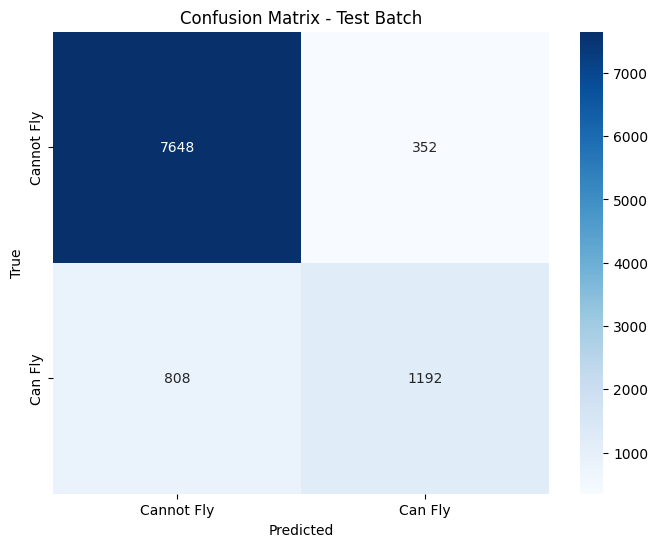

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_batch, annot=True, fmt='d', cmap='Blues', xticklabels=['Cannot Fly', 'Can Fly'], yticklabels=['Cannot Fly', 'Can Fly'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Test Batch')
plt.show()
